# Exploring Earthquake Data From USGS

## By: Garrick Hague

## Objective: 

### This project aims to explore earthquake data over the past century, spanning from January 1, 1906 to Febuary 26, 2023, with a specific focus on events registering a magnitude of 4.5 or greater. The data will be queried from the USGS, allowing for a comprehensive analysis of seismic activity during this time period.

# Background:

### The magnitude of an earthquake is determined by measuring the amplitude of waves recorded by seismographs, and is expressed in units based on the Richter scale. This scale uses a logarithmic function to assign values to earthquakes based on their relative strength. Earthquakes generate two main types of seismic waves: P waves and S waves. P waves are compressional waves that move through the earth like sound waves, and are the fastest type of wave. S waves, on the other hand, are shear waves that move rock up and down like ocean waves. As shown in the diagram below, P waves compress and expand as they move through the ground, while S waves move in a side-to-side motion. 

![waves](wave.gif)

### Most earthquakes occur along fault lines, where two or more tectonic plates are moving in different directions. The interaction between these plates can occur in three distinct ways. At convergent plate boundaries, one plate is pushed below the other, leading to the formation of large mountain ranges and the release of lava from deep within the earth. Divergent plate boundaries, on the other hand, occur when two plates are moving away from each other, allowing lava to flow up and create new crust. This process is a prominent feature of the Atlantic seafloor. Finally, transform plate boundaries occur when two plates are moving in opposite directions and grind against each other, resulting in seismic activity and the potential for earthquakes.

![Tectonic_plate_boundaries](Tectonic_plate_boundaries.png)

### The earth's crust is constantly moving, and the three types of boundaries - convergent, divergent, and transform - play a crucial role in shaping its surface. When earthquake locations are plotted on a map alongside these boundary regions, a clear pattern emerges, with most seismic activity occurring in these areas, as demonstrated in the diagram below.

![plateboundries](plate-boundary-map-780.jpeg)

In [1]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib.image import imread
import seaborn as sb
import numpy as np
import urllib
from IPython.display import Image
import urllib.request


# Loading in data: 

In [2]:
# When more than 2 years of data are queried from the usgs.gov website an error will occur. 
# This is resolved by a for loop that iterates through the range of years needed for this analysis

start_year = 1906
end_year = 2024

# for i in range(start_year, end_year, 2):
#     url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=' + str(i) + '-9-1&endtime=' + str(i+2) + '-9-1&minmagnitude=4.5&orderby=time'
#     urllib.request.urlretrieve(url,'query_'+str(i)+'-'+str(i+2)+'.csv')
    

# This created 25 csv files that need to be cleaned then merged together.
# Code is commented out so when the kernal is restarted it wont run the query again. 

In [3]:
# using a for loop to load data into different dataframes

namespace = globals()

for i in range(1906, 2024, 2):
    namespace['df_%d' % i] = pd.read_csv('query_'+str(i)+'-'+str(i+2)+'.csv')
   

# Getting familiar with data format:


In [4]:
# Lets first look at the shape of the data 

df_1906.shape

(169, 22)

In [5]:
# Now lets look at one of the dataframes to see what we are working with

df_1906

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1908-02-09T18:13:17.650Z,29.405,100.637,15.0,6.82,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:29:32.420Z,"143 km WSW of Kangding, China",earthquake,NaN,25.0,0.39,NaN,reviewed,iscgem,iscgem
1,1908-01-31T04:49:15.960Z,42.894,72.085,15.0,5.77,mw,NaN,NaN,NaN,NaN,...,2022-05-09T15:19:32.430Z,"43 km NNW of Talas, Kyrgyzstan",earthquake,NaN,25.0,0.20,NaN,reviewed,iscgemsup,iscgemsup
2,1908-01-15T12:57:21.300Z,37.587,141.782,35.0,6.82,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:29:27.244Z,"70 km E of Namie, Japan",earthquake,NaN,9.1,0.20,NaN,reviewed,iscgem,iscgem
3,1908-01-11T03:34:36.180Z,22.074,121.788,15.0,7.22,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:29:26.059Z,"108 km E of Hengchun, Taiwan",earthquake,NaN,12.8,0.20,NaN,reviewed,iscgem,iscgem
4,1907-12-30T05:26:55.740Z,10.679,-86.490,35.0,7.29,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:29:24.859Z,"92 km SW of San Juan del Sur, Nicaragua",earthquake,NaN,19.4,0.20,NaN,reviewed,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1906-01-21T13:49:33.570Z,34.175,138.025,300.0,7.40,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,NaN,25.0,0.30,NaN,reviewed,iscgem,iscgem
165,1906-01-09T23:04:45.570Z,49.256,18.421,15.0,5.63,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:36:39.809Z,"10 km WNW of Byt?a, Slovakia",earthquake,NaN,3.5,0.65,NaN,reviewed,iscgem,iscgem
166,1906-01-08T00:15:00.000Z,39.300,-96.600,NaN,4.90,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Kansas,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar
167,1906-01-06T21:31:33.220Z,53.418,170.100,35.0,6.58,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:39:47.898Z,"216 km WNW of Attu Station, Alaska",earthquake,NaN,3.5,0.20,NaN,reviewed,iscgem,iscgem


### As we examine the data, we can identify the presence of NaN values in several columns. To gain a better understanding of the extent of missing data, let's take a closer look at the columns that contain these NaN values.

In [6]:
# looking at the nan values in the data

df_1906.isna().sum()

time                 0
latitude             0
longitude            0
depth                7
mag                  0
magType              0
nst                169
gap                169
dmin               169
rms                169
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError    168
depthError           9
magError            10
magNst             169
status               0
locationSource       0
magSource            0
dtype: int64

### If we apply the NaN drop function to our dataset, we'll lose some valuable data that we want to keep. Instead, we can improve our analysis by dropping any irrelevant columns that contain NaN values and are not needed for our analysis.

In [7]:
# Drop Columns that arent needed 

namespace = globals()

for i in range(1906,2024,2):
    namespace['df_%d' % i] = namespace['df_%d' % i][['time', 'latitude','longitude', 'depth', 'mag']]


In [8]:
#Checking to see if only the columns that were requested are in the dataframe. 

df_1906

,time,latitude,longitude,depth,mag
0,1908-02-09T18:13:17.650Z,29.405,100.637,15.0,6.82
1,1908-01-31T04:49:15.960Z,42.894,72.085,15.0,5.77
2,1908-01-15T12:57:21.300Z,37.587,141.782,35.0,6.82
3,1908-01-11T03:34:36.180Z,22.074,121.788,15.0,7.22
4,1907-12-30T05:26:55.740Z,10.679,-86.490,35.0,7.29
...,...,...,...,...,...
164,1906-01-21T13:49:33.570Z,34.175,138.025,300.0,7.40
165,1906-01-09T23:04:45.570Z,49.256,18.421,15.0,5.63
166,1906-01-08T00:15:00.000Z,39.300,-96.600,NaN,4.90
167,1906-01-06T21:31:33.220Z,53.418,170.100,35.0,6.58


In [9]:
df_1906

,time,latitude,longitude,depth,mag
0,1908-02-09T18:13:17.650Z,29.405,100.637,15.0,6.82
1,1908-01-31T04:49:15.960Z,42.894,72.085,15.0,5.77
2,1908-01-15T12:57:21.300Z,37.587,141.782,35.0,6.82
3,1908-01-11T03:34:36.180Z,22.074,121.788,15.0,7.22
4,1907-12-30T05:26:55.740Z,10.679,-86.490,35.0,7.29
...,...,...,...,...,...
164,1906-01-21T13:49:33.570Z,34.175,138.025,300.0,7.40
165,1906-01-09T23:04:45.570Z,49.256,18.421,15.0,5.63
166,1906-01-08T00:15:00.000Z,39.300,-96.600,NaN,4.90
167,1906-01-06T21:31:33.220Z,53.418,170.100,35.0,6.58


In [10]:
# lets merge all the data into one dataframe

# This is the solution with hardcoding

df = pd.concat([df_2022, df_2020, df_2018, df_2016, df_2014, df_2012, df_2010, 
                df_2008, df_2006, df_2004, df_2002, df_2000, 
                df_1998, df_1996, df_1994, df_1992, df_1990, 
                df_1988, df_1986, df_1984, df_1982, df_1980,
                df_1978, df_1976, df_1974, df_1972, df_1970, 
                df_1968, df_1966, df_1964, df_1962, df_1960, 
                df_1958, df_1956, df_1954, df_1952, df_1950,
                df_1948, df_1946, df_1944, df_1942, df_1940,
                df_1938, df_1936, df_1934, df_1932, df_1930,
                df_1928, df_1926, df_1924, df_1922, df_1920,
                df_1918, df_1916, df_1914, df_1912, df_1910,
                df_1908, df_1906])

df 

df # looking at the new dataframe 

,time,latitude,longitude,depth,mag
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,10.000,4.90
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50
...,...,...,...,...,...
164,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40
165,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63
166,1906-01-08T00:15:00.000Z,39.3000,-96.6000,NaN,4.90
167,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58


### It appears that the merging of the dataframes was successful, resulting in a dataframe where the most recent earthquakes are listed at the top, and the oldest at the bottom. This dataframe contains a total of 5382 earthquakes that are 4.5 magnitude or higher.

In [11]:
# resetting the index 

df.reset_index(drop=True, inplace=True) 
df

,time,latitude,longitude,depth,mag
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,10.000,4.90
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50
...,...,...,...,...,...
303480,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40
303481,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63
303482,1906-01-08T00:15:00.000Z,39.3000,-96.6000,NaN,4.90
303483,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58


In [12]:
# Checking the Nan values to see if any are present

df.isna().sum()

time           0
latitude       0
longitude      0
depth        643
mag            0
dtype: int64

### Currently, there are some NaN values in the dataframe, both of which appear in the depth column. Since depth will not be used in this particular analysis, I will leave these NaN values as they are.

In [13]:
# checking to see if any data is a duplicate

df.duplicated().sum()



20353

In [14]:
# diving into this large number of duplicates

duplicates_data = df[df.duplicated()]

#pd.options.display.max_rows = None # setting the to see all rows

duplicates_data


,time,latitude,longitude,depth,mag
8930,2022-02-25T23:58:07.819Z,-4.9709,101.7374,35.0,4.80
8931,2022-02-25T23:54:36.959Z,11.8998,144.5243,10.0,4.60
8932,2022-02-25T23:53:24.752Z,11.7319,144.4918,10.0,5.00
8933,2022-02-25T23:45:43.234Z,11.8645,144.3431,10.0,5.00
8934,2022-02-25T23:43:13.855Z,11.6425,144.1273,10.0,4.90
...,...,...,...,...,...
303223,1910-01-01T11:01:58.730Z,17.0680,-84.1910,15.0,6.83
303316,1908-02-09T18:13:17.650Z,29.4050,100.6370,15.0,6.82
303317,1908-01-31T04:49:15.960Z,42.8940,72.0850,15.0,5.77
303318,1908-01-15T12:57:21.300Z,37.5870,141.7820,35.0,6.82


### It seems that there are duplicated entries in the queried data due to an overlap. The query started on Jan 1 and ended on Feb 23, causing this issue. To avoid this problem, I should have queried from the beginning of Jan until the end of the year. To resolve this, the duplicated entries will be eliminated from the dataset.

In [15]:
df = df.drop_duplicates()

In [16]:
# checking to see if duplicates were removed

df.duplicated().sum()

0

In [17]:
# looking at data types 

df.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
dtype: object

### I've noticed that the time is currently represented as a general object, but it needs to be converted to a datetime object for further processing.

In [18]:
df['time'] = pd.to_datetime(df['time'])

/var/folders/xk/1h2bmhd16677hq_kztjppff80000gn/T/ipykernel_50171/4237337754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


In [19]:
# Verifying data types are correct

df.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
depth                    float64
mag                      float64
dtype: object

## 

# Analysis:

In [20]:
# lets get some stat's for the data

df.describe()

,latitude,longitude,depth,mag
count,283132.000000,283132.000000,282540.000000,283132.000000
mean,4.381654,41.885638,69.795117,4.941265
std,29.459783,120.757518,115.794205,0.486020
min,-84.133000,-179.999700,-4.000000,3.380000
25%,-17.426025,-71.499000,10.000000,4.600000
50%,0.791000,99.178000,33.000000,4.800000
75%,29.909250,142.308000,60.792500,5.100000
max,87.386000,180.000000,700.900000,9.500000


### During the time period, the average magnitude of earthquakes was 4.94, with an average depth of 69.79 km. Notably, the most powerful earthquake recorded during this period had a magnitude of 9.5. To gain a deeper understanding of this significant event and its impact, let's explore its characteristics in greater detail.

In [21]:
max_index = df['mag'].idxmax() # Creating a variable of the max magnitude 
max_data = df.loc[max_index, :] # storing the row of the largest earthquake
max_data

time         1960-05-22 19:11:20+00:00
latitude                       -38.143
longitude                      -73.407
depth                             25.0
mag                                9.5
Name: 291974, dtype: object

### The most powerful earthquake during the time period being considered took place on May 22, 1960, with a magnitude of 9.5 and a depth of 25 km. To gain further insight into the earthquake's location and magnitude, let's generate a plot that visualizes its epicenter on the surface of the Earth.

/Users/garrickhague/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/Users/garrickhague/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/Users/garrickhague/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interfa

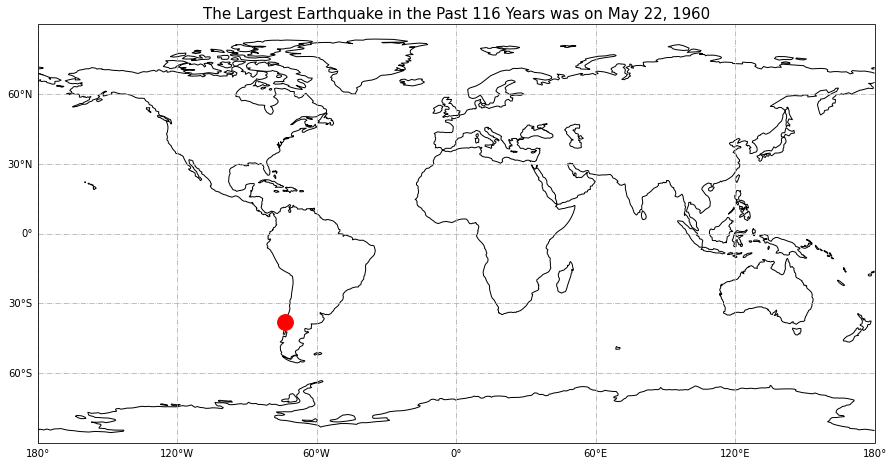

In [22]:

plt.figure(figsize=(15, 15)) # creating a figure with size being 20 by 20

ax = plt.axes(projection=ccrs.PlateCarree()) # Projecting PlateCarree from the cartopy library

ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) # Showing entire globe in PlateCarree format

gl = ax.gridlines(linestyle='-.', draw_labels=True) # adding gridlines to the plot
gl.top_labels = False # removing the top label
gl.right_labels = False # removing the right label

ax.coastlines() # adding coastlines to the plot

p = ax.scatter(x=max_data['longitude'], y=max_data['latitude'], s=250, c='r') # Plotting the max magnitude data point

plt.title('The Largest Earthquake in the Past 116 Years was on May 22, 1960', fontsize=15)

plt.show()

# 1960 Great Chilean Earthquake and Tsunami

### According to NOAA, this was the most powerful earthquake ever recorded. The earthquake lasted for approximately 10 minutes and resulted in several tsunamis that impacted numerous countries, including southern Chile, Hawaii, Japan, the Philippines, New Zealand, Australia, and the Aleutian Islands. Although the exact death toll is uncertain, estimates suggest that it could be between 1,000 to 6,000 people. The overall cost of the earthquake, in today's currency, was approximately 8.02 billion dollars.
    
    
![plateboundries](Valdivia_after_earthquake,_1960.jpeg)


# Examine All Eathquakes

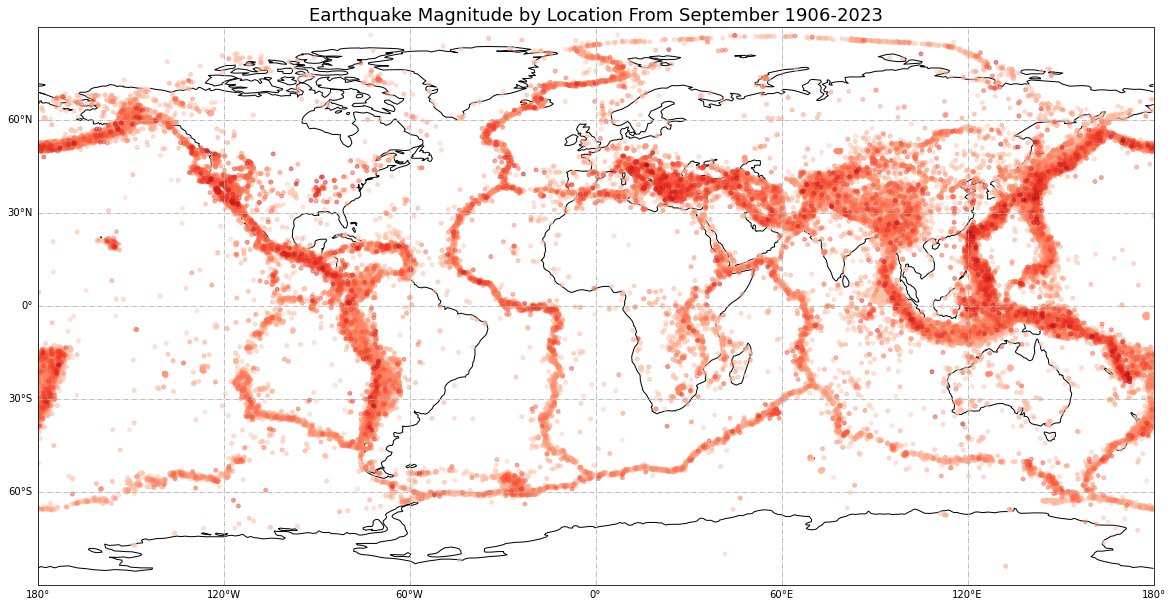

In [23]:

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=df['longitude'], y=df['latitude'], c =df['mag'].sort_values(), cmap='Reds', alpha=0.5, s=15)
plt.title('Earthquake Magnitude by Location From September 1906-2023', fontsize=18)


plt.ylabel('Magnitude', fontsize=16)

plt.show()


### The above plot depicts the locations of all earthquakes, with the magnitude of each earthquake indicated by different shades of red. Darker shades of red represent stronger earthquakes. The plot clearly illustrates the location of the plate boundaries, which are where the majority of earthquakes tend to occur.

### To gain a broader perspective on the most powerful earthquakes of the past 116 years, let's explore the locations of all earthquakes with a magnitude of 8 or greater.

In [24]:
strong_earthequakes = df[df['mag']>=8] # create an new Dataframe with earthquakes of 8 or greater
strong_earthequakes.shape # looking at the amount of elements in the new DF

(97, 5)

### These results illustrate a total of 97 significant earthquakes that meet our criteria of a magnitude of 8 or higher.

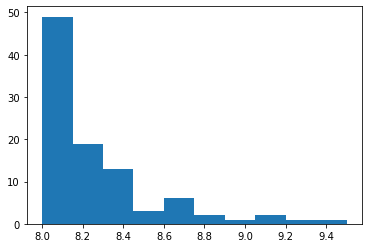

In [25]:
# Lets take a quick look at a histogram of the strong data magnitude
plt.hist(strong_earthequakes['mag'])

plt.show()

### This finding is particularly intriguing, as it seems to follow an exponential distribution, with only a handful of earthquakes measuring 8.6 or higher. To delve deeper into this pattern, let's generate a plot that displays the locations of these events.

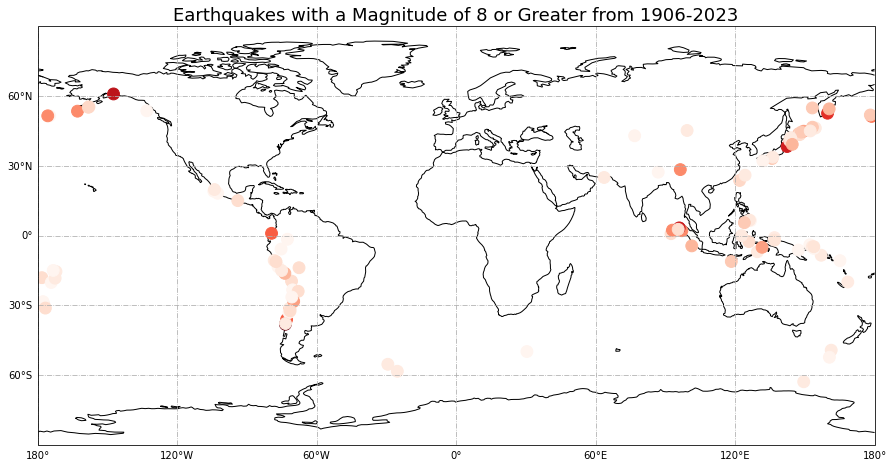

In [29]:

plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) # Zooming in on the graph

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=strong_earthequakes['longitude'], y=strong_earthequakes['latitude'], c =strong_earthequakes['mag'], cmap='Reds', s=140)
plt.title('Earthquakes with a Magnitude of 8 or Greater from 1906-2023', fontsize=18)


plt.show()



![plateboundries](plate-boundary-map-780.jpeg)

### The analysis suggests that the most intense seismic events tend to occur in proximity to tectonic plate boundaries. Interestingly, the most powerful earthquakes in the dataset were observed in the regions surrounding Indonesia, Japan, and the western coast of South America. Notably, the majority of these strongest earthquakes occurred at convergent plate boundaries, which is a significant finding.

### Lets plot 

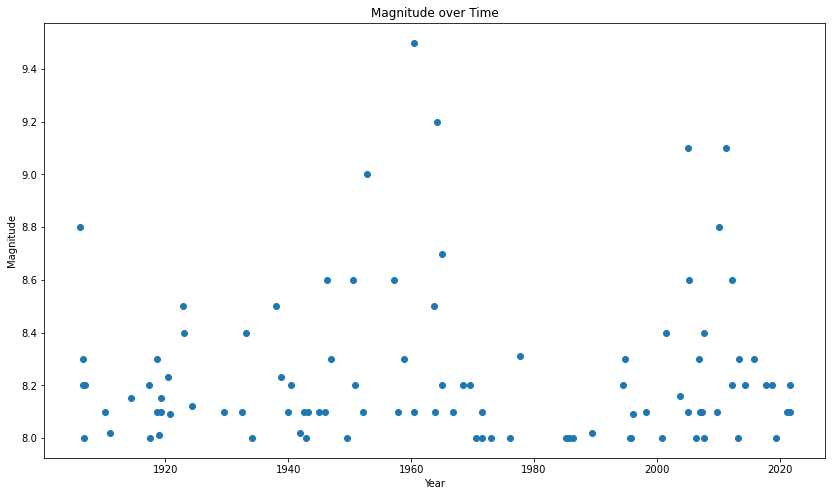

In [27]:
plt.figure(figsize=(14, 8))
plt.scatter(strong_earthequakes['time'], strong_earthequakes['mag'])
plt.title("Magnitude over Time")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.show()


In [28]:
df_size = len(df['time'])
df_size

strong_earthequakes_size = len(strong_earthequakes['time'])
strong_earthequakes_size

print('{} is the percentage of strong earthquakes to all earthquakes >4.5 magnitude'.format((strong_earthequakes_size / df_size) * 100))

0.03425963861379145 is the percentage of strong earthquakes to all earthquakes >4.5 magnitude


# Conclusion:

### One of the most interesting discoveries from this analysis is that strong earthquakes are not necessarily associated with a particular length of time. While it is difficult to observe any specific patterns associated with strong earthquakes, they are relatively rare events, with a probability of occurring only 0.034 percent of the time in earthquakes that measure 4.5 or higher. Notably, the majority of the strongest earthquakes occur near convergent plate boundaries, which suggests that these regions are particularly prone to seismic activity. 

### There are several potential avenues for further analysis of this dataset. For instance, one could isolate the data for a specific region and calculate the probability of a strong earthquake occurring in that area, thus providing valuable insights for disaster preparedness and risk management. In addition, an interactive dashboard using Tableau or a similar program could help illustrate just how rare these events are and demonstrate the clustering of strong earthquakes near convergent plate boundaries. By merging another dataset that includes information about the type of plate boundary at a given location, even more insights could be gained and our understanding of earthquake behavior could be greatly enhanced.

# Many thanks for your time, Garrick.